# Practical 4: Infinite Horizon Dynamic Programming

Author: CAMERON STROUD

Student Number: n11552123

### Learning Outcomes:
- Infinite horizon dynamic programming
- Value Iteration
- Policy Iteration

We will require the following library for this practical (Import all necessary libraries before running the code):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

import gymnasium as gym


import os
from IPython.display import clear_output

## Part A: Value Iteration

### Example 1: Grid World
Consider a robot navigating in a grid-based environment. Each cell in the grid represents a distinct state of the surroundings. The robot can take four deterministic actions at each cell: "up," "down," "left," and "right," resulting in the robot to move precisely one cell in the corresponding direction on the grid. Actions that would take the agent off the grid are not allowed. Within the grid, certain states (orange) correspond to undesirable conditions, such as rough terrain, while one state (green) represents the ultimate goal.

Upon reaching the goal state, the robot gains a reward of 1. Conversely, traversing the rough terrain incurs a penalty (or negative reward) of 10. Additionally, every move the robot makes entails a penalty of 1. The robot's primary objective is to efficiently reach the goal state, aiming to maximize the total reward (minimize the total penalty) incurred. This entails both avoiding the rough terrain and efficiently navigating through the grid.

<img src="grid_world.png" alt="Image" width="300" height="300" />

### Q1
Observe the grid world, what do you intuit as the optimal policy for each cell?

\[RIGHT DOWN DOWN DOWN\]  
\[RIGHT RIGHT RIGHT DOWN\]  
\[RIGHT UP RIGHT DOWN\]  
\[RIGHT UP RIGHT . \]

### Q2
Complete the following code to implement the value iteration algorithm for the grid world problem. Print the outcomes of the optimal value function and the corresponding optimal policy.

In [5]:
# Define the grid world as a matrix using np.array. Each entry correspond to its reward.
grid = np.array([
    [0, 0, -10, 0],
    [0, 0, 0, 0],
    [0, 0, -10, 0],
    [0, 0, -10, 1]
])

In [6]:
# PRACTICAL 5 GRID
grid = np.array([
    [0, 0, -10, 0],
    [0, 0, 0, 0],
    [0, -10, 0 , 0],
    [0, 0, -10, 1]
])

In [7]:
# Initialize the value function as a zero matrix with the same shape with the grid.
values = np.zeros_like(grid, dtype=float)

In [8]:
# Define the function to get next state. The action includes "up", "down", "left", "right".
def get_next_state(i, j, action):
    # Hint: (i,j) represents the position. Change "i" or "j" for each action.
    ### START CODE HERE ###
    if action == 'up':
        i -= 1
    elif action == 'down':
        i += 1
    elif action == 'right':
        j += 1
    elif action == 'left':
        j -= 1
    else:
        print('Invalid action')
        return False
    return i, j
    
    ### END CODE HERE ###

In [9]:
# Define the function to check if the next state is valid. The states beyond the grid are not valid. This function returns Boolean value.
def is_valid_state(i, j, grid):
    rows, cols = grid.shape
    return 0 <= i < rows and 0 <= j < cols

In [10]:
# Perform value iteration
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###
            reward = []
            for action in ['up', 'down', 'left', 'right']:
                new_i, new_j = get_next_state(i, j, action)
                if is_valid_state(new_i, new_j, grid):
                    action_cost = grid[i, j] + alpha * values[new_i, new_j] - 1
                    reward.append(action_cost)
            new_values[i,j] = max(reward)
    delta = new_values - values
    ### END CODE HERE ###
    values = new_values
    if (np.abs(delta) < epsilon).all():
        break

In [11]:
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 1:
            policy[i, j] = 'T'  # Terminal state
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:
            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            new_i, new_j = get_next_state(i, j, action)
            if is_valid_state(new_i, new_j, grid):
                reward = values[new_i, new_j]
                if reward > best_value:
                    best_value = reward
                    best_action = action
            ### END CODE HERE ###

        policy[i, j] = best_action

In [12]:
print(values)
print(policy)

[[ -4.68559    -4.0951    -13.439      -2.71     ]
 [ -4.0951     -3.439      -2.71       -1.9      ]
 [ -4.68559   -12.71       -1.9        -1.       ]
 [ -5.217031   -5.6953279 -11.          0.       ]]
[['down' 'down' 'down' 'down']
 ['right' 'right' 'down' 'down']
 ['up' 'right' 'right' 'down']
 ['up' 'left' 'right' 'T']]


### Q3
__Does the optimal policy align with your initial expectations?__

Intuition:  
 \[RIGHT DOWN DOWN DOWN\]  
\[RIGHT RIGHT RIGHT DOWN\]  
\[RIGHT UP RIGHT DOWN\]  
\[RIGHT UP RIGHT . \]  

Optimal policy:  
[['down' 'down' 'down' 'down']  
 ['right' 'right' 'right' 'down']  
 ['up' 'up' 'right' 'down']  
 ['up' 'up' 'right' 'T']]  
 
 There is some differences between my intuition and the optimal policy, but they are mostly based on prioritisation of actions at the same cost. For many states, the cost of a policy is equal to the cost of a different policy (eg. bottom left corner has equal cost for up and for right). My intuition was that minimising the distance to the goal would be preferred, but as there are no inclusion of heuristics in the value iteration algorithm, the choice of action is simply the first in the list of actions. 

### Q4
Now, let's examine an alternative scenario where the penalty of traversing rough terrain is 1, and the reward for reaching the goal state is 10. What do you intuit as the optimal policy?

<img src="grid_world2.png" alt="Image" width="300" height="300" />

With a low cost for traversing rough terrain and large reward for reaching the goal, the optimal policy may result in taking some shortcuts through non ideal terrain. For example, in Row 4, Col 2 the previous scenario skirted the rough terrain, but the increase in reward for being one step from the goal would likely make the shortcut worthwhile in the new scenario. This reward should also propogate as a pseduo-heuristic of minimising distance to the goal state, something that was missing in the previous scenario due to the small goal reward.

[['DOWN' 'DOWN' 'DOWN' 'DOWN']  
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN']  
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN']  
 ['RIGHT' 'RIGHT' 'RIGHT' 'T']]  

### Q5
Modify the code above to implement value iteration for the revised scenario. 

In [11]:
grid = np.array([
    [0, 0, -1, 0],
    [0, 0, 0, 0],
    [0, 0, -1, 0],
    [0, 0, -1, 10]
])

while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###
            reward = []
            for action in ['up', 'down', 'left', 'right']:
                new_i, new_j = get_next_state(i, j, action)
                if is_valid_state(new_i, new_j, grid):
                    action_cost = grid[i, j] + alpha * values[new_i, new_j] - 1
                    reward.append(action_cost)
            new_values[i,j] = max(reward)
    delta = new_values - values
    ### END CODE HERE ###
    values = new_values
    if (np.abs(delta) < epsilon).all():
        break
        
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 10:
            policy[i, j] = 'T'  # Terminal state
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:
            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            new_i, new_j = get_next_state(i, j, action)
            if is_valid_state(new_i, new_j, grid):
                reward = values[new_i, new_j]
                if reward > best_value:
                    best_value = reward
                    best_action = action
            ### END CODE HERE ###

        policy[i, j] = best_action
        
print(values)
print(policy)

[[17.97054007 21.07837785 23.53154007 28.36837785]
 [21.07837785 24.53154007 28.36837785 32.63154007]
 [23.80254007 27.55837785 31.63154007 37.36837785]
 [27.55837785 31.73154007 36.36837785 42.63154007]]
[['down' 'down' 'down' 'down']
 ['right' 'right' 'right' 'down']
 ['down' 'down' 'right' 'down']
 ['right' 'right' 'right' 'T']]


### Q6
__Assess whether the resultant optimal policy aligns with your intuition in Q5. Provide an explanation for the observed outcome in relation to your intuition.__

The results are consistent with my intuition of the optimal policy, but again I missed the equal-reward transitions. In (2, 1)\* I had also missed that the 'down' action would have a better reward than 'right' through the rough-terrain, although I knew the path it would take would ultimately attempt traversal through the rough terrain.

\* 0-indexed

### Q7
__Now, let's introduce a new consideration: The orange states are some holes. If the robot falls into the hole, the game will be reset, and the robot will be reinitialized back to the starting point (0,0). Intuit the optimal policy for the two previously scenarios: one with a penalty of 10 and a reward of 1, and the other with a penalty of 1 and a reward of 10.__

10 Penalty, 1 Reward:  
[['DOWN' 'DOWN' '' 'DOWN']  
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN']  
 ['UP' 'UP' '' 'DOWN']  
 ['UP' 'UP' '' 'T']]  
 
 1 Penalty, 10 Reward:  
 [['DOWN' 'DOWN' '' 'DOWN']  
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN']  
 ['RIGHT' 'UP' '' 'DOWN']  
 ['RIGHT' 'UP' '' 'T']]  
 
 In the first instance, the optimal policy avoided the pits and we would expect to see the same happening here, while the second policy should begin to avoid the pits as a result of the additional cost imposed by resetting to 0

### Q8
Implement the value iteration algorithm for the scenario where the robot resets upon falling into holes. Print the optimal value function and optimal policy outcomes. Do these results align with your initial expectations?

In [14]:
# Penalty 10, Reward 1
PENALTY = -10
REWARD = 1
grid = np.array([
    [0, 0, PENALTY, 0],
    [0, 0, 0, 0],
    [0, 0, PENALTY, 0],
    [0, 0, PENALTY, REWARD]
])

# VI
while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == REWARD:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###
            reward = []
            for action in ['up', 'down', 'left', 'right']:
                new_i, new_j = get_next_state(i, j, action)
                if is_valid_state(new_i, new_j, grid):
                    if grid[new_i, new_j] == PENALTY:
                        new_i = 0
                        new_j = 0
                    action_cost = grid[i, j] + alpha * values[new_i, new_j] - 1
                    reward.append(action_cost)
            new_values[i,j] = max(reward)
    delta = new_values - values
    ### END CODE HERE ###
    values = new_values
    if (np.abs(delta) < epsilon).all():
        break
        
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == REWARD:
            policy[i, j] = 'T'  # Terminal state
            continue
            
        if grid[i, j] == PENALTY:
            policy[i, j] = 'H' # hole
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:
            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            new_i, new_j = get_next_state(i, j, action)
            if is_valid_state(new_i, new_j, grid):
                reward = values[new_i, new_j]
                if reward > best_value:
                    best_value = reward
                    best_action = action
            ### END CODE HERE ###

        policy[i, j] = best_action
        
print(values)
print(policy)

[[17.97055828 21.07839809 14.53155344 28.36839271]
 [21.07839809 24.53155344 28.36839271 32.63154745]
 [17.97055828 21.07839809 22.63154745 37.36838606]
 [15.17349809 17.97055828 27.36838606 42.63154007]]
[['down' 'down' 'H' 'down']
 ['right' 'right' 'right' 'down']
 ['up' 'up' 'H' 'down']
 ['up' 'right' 'H' 'T']]


In [16]:
# Penalty 1, Reward 10
PENALTY = -1
REWARD = 10
grid = np.array([
    [0, 0, PENALTY, 0],
    [0, 0, 0, 0],
    [0, 0, PENALTY, 0],
    [0, 0, PENALTY, REWARD]
])

# VI
while True:
    delta = 0
    new_values = np.copy(values)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == REWARD:  # Terminal state
                continue

            # Hint: use "for action in ['up', 'down', 'left', 'right']:" to update the value function
            ### START CODE HERE ###
            reward = []
            for action in ['up', 'down', 'left', 'right']:
                new_i, new_j = get_next_state(i, j, action)
                if is_valid_state(new_i, new_j, grid):
                    if grid[new_i, new_j] == PENALTY:
                        new_i = 0
                        new_j = 0
                    action_cost = grid[i, j] + alpha * values[new_i, new_j] - 1
                    reward.append(action_cost)
            new_values[i,j] = max(reward)
    delta = new_values - values
    ### END CODE HERE ###
    values = new_values
    if (np.abs(delta) < epsilon).all():
        break
        
# Obtain the optimal policy
policy = np.empty_like(grid, dtype='<U5')  # Unicode strings with length 5
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == REWARD:
            policy[i, j] = 'T'  # Terminal state
            continue
            
        if grid[i, j] == PENALTY:
            policy[i, j] = 'H' # hole
            continue

        best_action = None
        best_value = float('-inf')

        for action in ['up', 'down', 'left', 'right']:
            # Hint: select the action with the maximum value
            ### START CODE HERE ###
            new_i, new_j = get_next_state(i, j, action)
            if is_valid_state(new_i, new_j, grid):
                reward = values[new_i, new_j]
                if reward > best_value:
                    best_value = reward
                    best_action = action
            ### END CODE HERE ###

        policy[i, j] = best_action
        
print(values)
print(policy)

[[17.97056539 21.07840885 23.53156539 28.36840599]
 [21.07840885 24.53156539 28.36840599 32.63156221]
 [17.97056539 21.07840885 31.63156221 37.36840246]
 [15.17350885 17.97056539 36.36840246 42.63155828]]
[['down' 'down' 'H' 'down']
 ['right' 'right' 'right' 'down']
 ['up' 'right' 'H' 'down']
 ['up' 'right' 'H' 'T']]


  
Interestingly, both policies utilise the resetting of the pit in order to minimise the path cost. The first policy only opts for reset on the bottom hole, however, while the latter falls in both the bottom paths


### Example 2: Frozen Lake

Frozen lake is a gymnasium environment involving crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake. (See the documentation: https://gymnasium.farama.org/environments/toy_text/frozen_lake/)

The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.  The player makes moves until they reach the goal or fall in a hole.
The observation is the player’s current position. The action space consists of "left, down, right, up". The reward of reaching the goal is 1, otherwise 0.

0: Move left

1: Move down

2: Move right

3: Move up


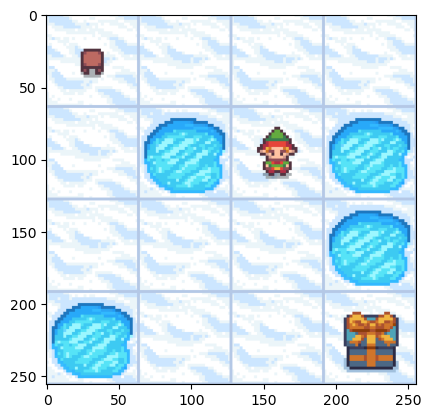

In [21]:
# This is a simple example of the gymnasium interaface. You can run this cell to visualize the environment
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(20):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      observation, info = env.reset()
        
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

### Q9
We first consider deterministic Frozen Lake (use argument is_slippery=False). Observe the Frozen Lake environment, and intuit the optimal policy. What is the optimal action at each position? Explain why you chose this action.

0,0: DOWN  
Out of 2 possible actions, down comes first in the list

0,1: RIGHT  
Out of 2 possible actions, right would have lower cost as there's less movement required to reach the goal

0,2: DOWN  
Moves towards the goal

0,3: LEFT  
Down results in falling into a hole, left is the only option

1,0: DOWN  
Move towards goal, right would result in falling in a hole

1,3: DOWN  
Move towards goal

2,0: RIGHT  
Move towards hole, down would result in falling in a hole

2,1: DOWN  
Either right or down would work, down comes first in the list

2,2: DOWN  
Move towards goal

3,1: RIGHT  
Move towards goal

3,2 RIGHT  
Move towards goal

[[DOWN RIGHT DOWN LEFT]  
[DOWN H DOWN H]  
[RIGHT DOWN DOWN H]  
[H RIGHT RIGHT T]]

### Q10
Implement value iteration algorithm to obtain an optimal policy for Frozen Lake environment.

In [123]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

In [124]:
alpha = 0.99  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
t=0
start_time = time.time()
while True:
    t+=1
    delta = 0

    # Update the value function for each state
    for s in range(num_states):
        v = V[s]
        
        # Compute the value for each action in the current state
        q_values = []
        for a in range(num_actions):
            q_value = 0
            for prob, next_state, reward, _ in env.P[s][a]:
                ### START CODE HERE ###
                q_value += prob * (reward + alpha*V[next_state])
                ### END CODE HERE ###
            q_values.append(q_value)

        # Choose the action that maximizes the value
        V[s] = max(q_values)

        # Compute the difference between the new and old value
        delta = max(delta, np.abs(v - V[s]))

    # Check if the value function has converged
    if delta < epsilon:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)

7
0.00037298883710588725


In [125]:
# Obtain the optimal policy
policy = np.zeros(num_states, dtype=int)
for s in range(num_states):
    
    # Hint: using your value function "V" to choose the action that maximizes the value in the current state
    ### START CODE HERE ###
    action_cost = []
    for a in range(num_actions):
        value = 0
        for prob, next_state, reward, _ in env.P[s][a]:
            ### START CODE HERE ###
            value += prob * (reward + alpha*V[next_state])
            ### END CODE HERE ###
        action_cost.append(value)
    policy[s] = np.argmax(action_cost)
    ### END CODE HERE ###

optimal_values = V
optimal_policy = policy
print("Optimal Policy:")
print(optimal_policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(optimal_values.reshape((4, 4)))

Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.96059601]
 [0.96059601 0.         0.9801     0.        ]
 [0.970299   0.9801     0.99       0.        ]
 [0.         0.99       1.         0.        ]]


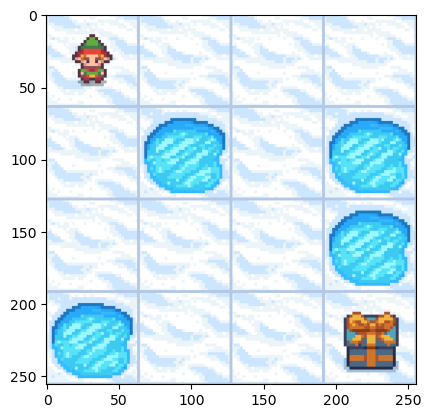

In [126]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = optimal_policy[observation]# this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if observation == 15: # goal state?
        done = True
    
    if terminated or truncated:
        observation, info = env.reset()
        
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

### Q11
Does the observed optimal policy match your initial expectations? Provide an explanation for the alignment or any disparities that you may have observed.

Yes, the optimal policy matches my initial expectations.

## Part B: Policy Iteration

### Q12
Complete the following code to implement policy iteration algorithm to obtain an optimal policy for Frozen Lake environment.

In [127]:
# Create the environment of Frozen Lake
env = gym.make("FrozenLake-v1",is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])

In [128]:
alpha = 0.9  # Discount factor
epsilon = 1e-5  # Convergence threshold

num_states = env.observation_space.n
num_actions = env.action_space.n
V = np.zeros(num_states)  # Initialization the value function for each state
policy = np.random.randint(low=0, high=num_actions, size=num_states)
t=0
# Policy Iteration algorithm
start_time = time.time()
while True:
    t+=1
    while True:
        delta = 0
        for s in range(num_states):
            
            # Policy evaluation
            v = V[s]
            action = policy[s]
            q_value = 0
            for trans_prob, next_state, reward, done in env.P[s][action]:
                ### START CODE HERE ###
                q_value += trans_prob * (reward + alpha*V[next_state])
                ### END CODE HERE ###
            V[s] = q_value
            
            delta = max(delta, np.abs(v - V[s]))
        if delta < epsilon:
            break

    policy_stable = True
    for s in range(num_states):
        old_action = policy[s]
        q_values = np.zeros(num_actions)
        # Hint: policy improvement
        ### START CODE HERE ###
        for a in range(num_actions):
            value = 0
            for trans_prob, next_state, reward, done in env.P[s][a]:
                value += trans_prob * (reward + alpha*V[next_state])
            q_values[a] = value      
        policy[s] = np.argmax(q_values)            
        ### END CODE HERE ###
        
        
        # Hint: termination condition. If all old action is equal to new action, the iteration is terminated.
        ### START CODE HERE ###
        if (policy[s] != old_action):
            policy_stable = False
        ### END CODE HERE ###

    if policy_stable:
        break
end_time = time.time()
execution_time = end_time - start_time
print(t)
print(execution_time/t)
print("Optimal Policy:")
print(policy.reshape((4, 4)))
print("\nOptimal Value Function:")
print(V.reshape((4, 4)))

7
0.000610555921282087
Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Optimal Value Function:
[[0.59049 0.6561  0.729   0.6561 ]
 [0.6561  0.      0.81    0.     ]
 [0.729   0.81    0.9     0.     ]
 [0.      0.9     1.      0.     ]]


### Q13
Evaluate the optimal policy by policy iteration in Frozen Lake environment.

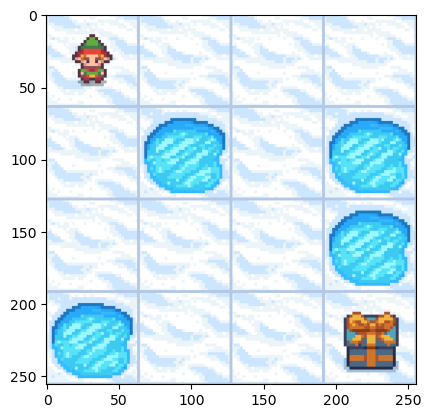

In [129]:
# Evaluate the agent trained by value iteration
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False, map_name="4x4",  desc=["SFFF", "FHFH", "FFFH", "HFFG"])  # Establish again a visual environment
env.action_space.seed(42)

observation, info = env.reset(seed=42)
done = False

while not done:
    ### START CODE HERE ###
    action = policy[observation] # this is where you would insert your policy
    ### END CODE HERE ###
    observation, reward, terminated, truncated, info = env.step(action)

    if observation == 15: # goal state?
        done = True
    
    if terminated or truncated:
        observation, info = env.reset()
        
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

## Part C: Analysis

### Q14
__For Frozen Lake scenario, do the outcomes of value iteration and policy iteration align? Provide an explanation for your observation.__

Yes, the outcomes for value an policy iteration align. Whilst the focus of each method is different (optimal value vs optimal policy), the end result is still some optimal value function providing a mapping to an optimal policy (assuming they each converge), based on the Bellman Equation.

### Q15
__In Q10 and Q12, print the number of iterations and the runtime per iteration for both algorithms. Compare the differences between these two algorithms based on the iteration count and the time taken for each iteration.__

Each take 7 iterations to converge on their respective solutions, while Value Iteration took 0.37ms/iter and Policy Iteration took 0.64ms/iter. The time difference is expected as Policy Iteration has to run through 2 loops for policy evaluation and improvement, and is evaluated over an infinite horizon. This should ultimately result in fewer iterations, but in this case the same number of iterations are observed. This may be more disparate on a more complex problem, however.

### Q16
Now, consider the stochastic Frozen Lake environemnt (Set the argument "is_slippery=True"). The lake is slippery so the player may move perpendicular to the intended direction sometimes. For example, if action is left and is_slippery is True, then:
- P(move left)=1/3
- P(move up)=1/3
- P(move down)=1/3

__Evaluate the optimal policy obtained in deterministic scenario for the stochastic scenario. Does it work? Why?__

Whilst there is a risk of falling into the hole, the same optimal policy realised for the deterministic should also be the optimal for the stochastic case. At each step, there is at least a 2/3 chance of safety, as only 1 out of 3 transitions results in failure. 

### Q17
__Implement both value and policy iteration for the stochastic environment, and observe the optimal policy.__

__Value Iteration:__  
Optimal Policy:  
[[0 3 3 3]  
 [0 0 0 0]  
 [3 1 0 0]  
 [0 2 1 0]]

__Policy Iteration:__  
Optimal Policy:  
[[0 3 0 3]  
 [0 0 0 0]  
 [3 1 0 0]  
 [0 2 1 0]]



### Q18
__Discuss similarities and differences of the optimal policy in deterministic and stochastic scenarios.__

With the chance of falling into the holes, the values have changed to avoid the risk. Interestingly, it employs running into the boundary as a method of traversing, exploiting the probabilistic nature of the transitions, as it is safer than directly attempting to transition to the next square. Another change is that the difference between PI and VI are much more apparent, where VI required 180 iterations to converge, PI achieved the same in only 3.  

### Q19
__Change the map size and randomized locations of holes, and compute the optimal policy.__

["SFFH","FFFF","FFHF","HFFG"] :  
__VI:__  
Optimal Policy:  
[[1 2 0 0]  
 [1 2 3 1]  
 [3 0 0 2]  
 [0 2 1 0]]

 
 __PI:__  
 Optimal Policy:  
[[1 2 0 0]  
 [1 2 3 1]  
 [3 0 0 2]  
 [0 2 1 0]]


["SFFHH","FFFFF","FFFFF","FFHFF","HFFFG"] :  
__VI:__  
Optimal Policy:  
[[1 2 0 0 0]  
 [1 2 1 1 1]  
 [1 2 3 2 1]  
 [3 0 0 2 1]  
 [0 2 1 2 0]]
 
__PI:__  
[[1 2 0 0 0]  
 [1 2 1 1 1]  
 [1 2 3 2 1]  
 [3 0 0 2 1]  
 [0 2 1 2 0]]

### Q20
__Suppose that the grid is extremely large with a large number of states. Are there deficiencies with value and policy iteration? Discuss how to obtain the optimal policy?__

The base PI and VI both require updating the entire state space at each iteration. With a large number of states, this introduces signficant computation issues. One can alter PI or VI to some asynchronous variant, wherein only a subset of the state space is worked on. 